### Overview
HELP International is an international humanitarian NGO that is trying to help the backward countries all around the world, as a Data scientist we need to understand the Summarized data of Various countries and choose the countries that needs the aid of HELP international .

The steps are broadly:

- Read and understand the data
- Clean the data
- Prepare the data for modelling
- Modelling

## 1. Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
Help_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
Help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# basics of the df
Help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
Help_df.shape

(167, 10)

In [5]:
Help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Observations from the data:-
- This data is dealing with 10 different features of 167 countries
- There are no null values provided in any of the records so we don't have to treat any nulls here
- All the features or variables available in this data is Numerical variables

## 2. Clean/ Data Visualization
Null records handling and uni variate and bi variate analysis

In [6]:
# missing values
round(100*(Help_df.isnull().sum())/len(Help_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- Fields like exports,health, imports are the percentage values of the GDPP, it will be good if we convert them to numerical values that 
 helps in effective way while scaling the data.

##### Converting all the % values to Numerical values


In [7]:
Help_df['exports']=Help_df['exports']*Help_df['gdpp']/100

In [8]:
Help_df['imports']=Help_df['imports']*Help_df['gdpp']/100

In [9]:
Help_df['health']=Help_df['health']*Help_df['gdpp']/100

In [10]:
Help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Univariate analysis

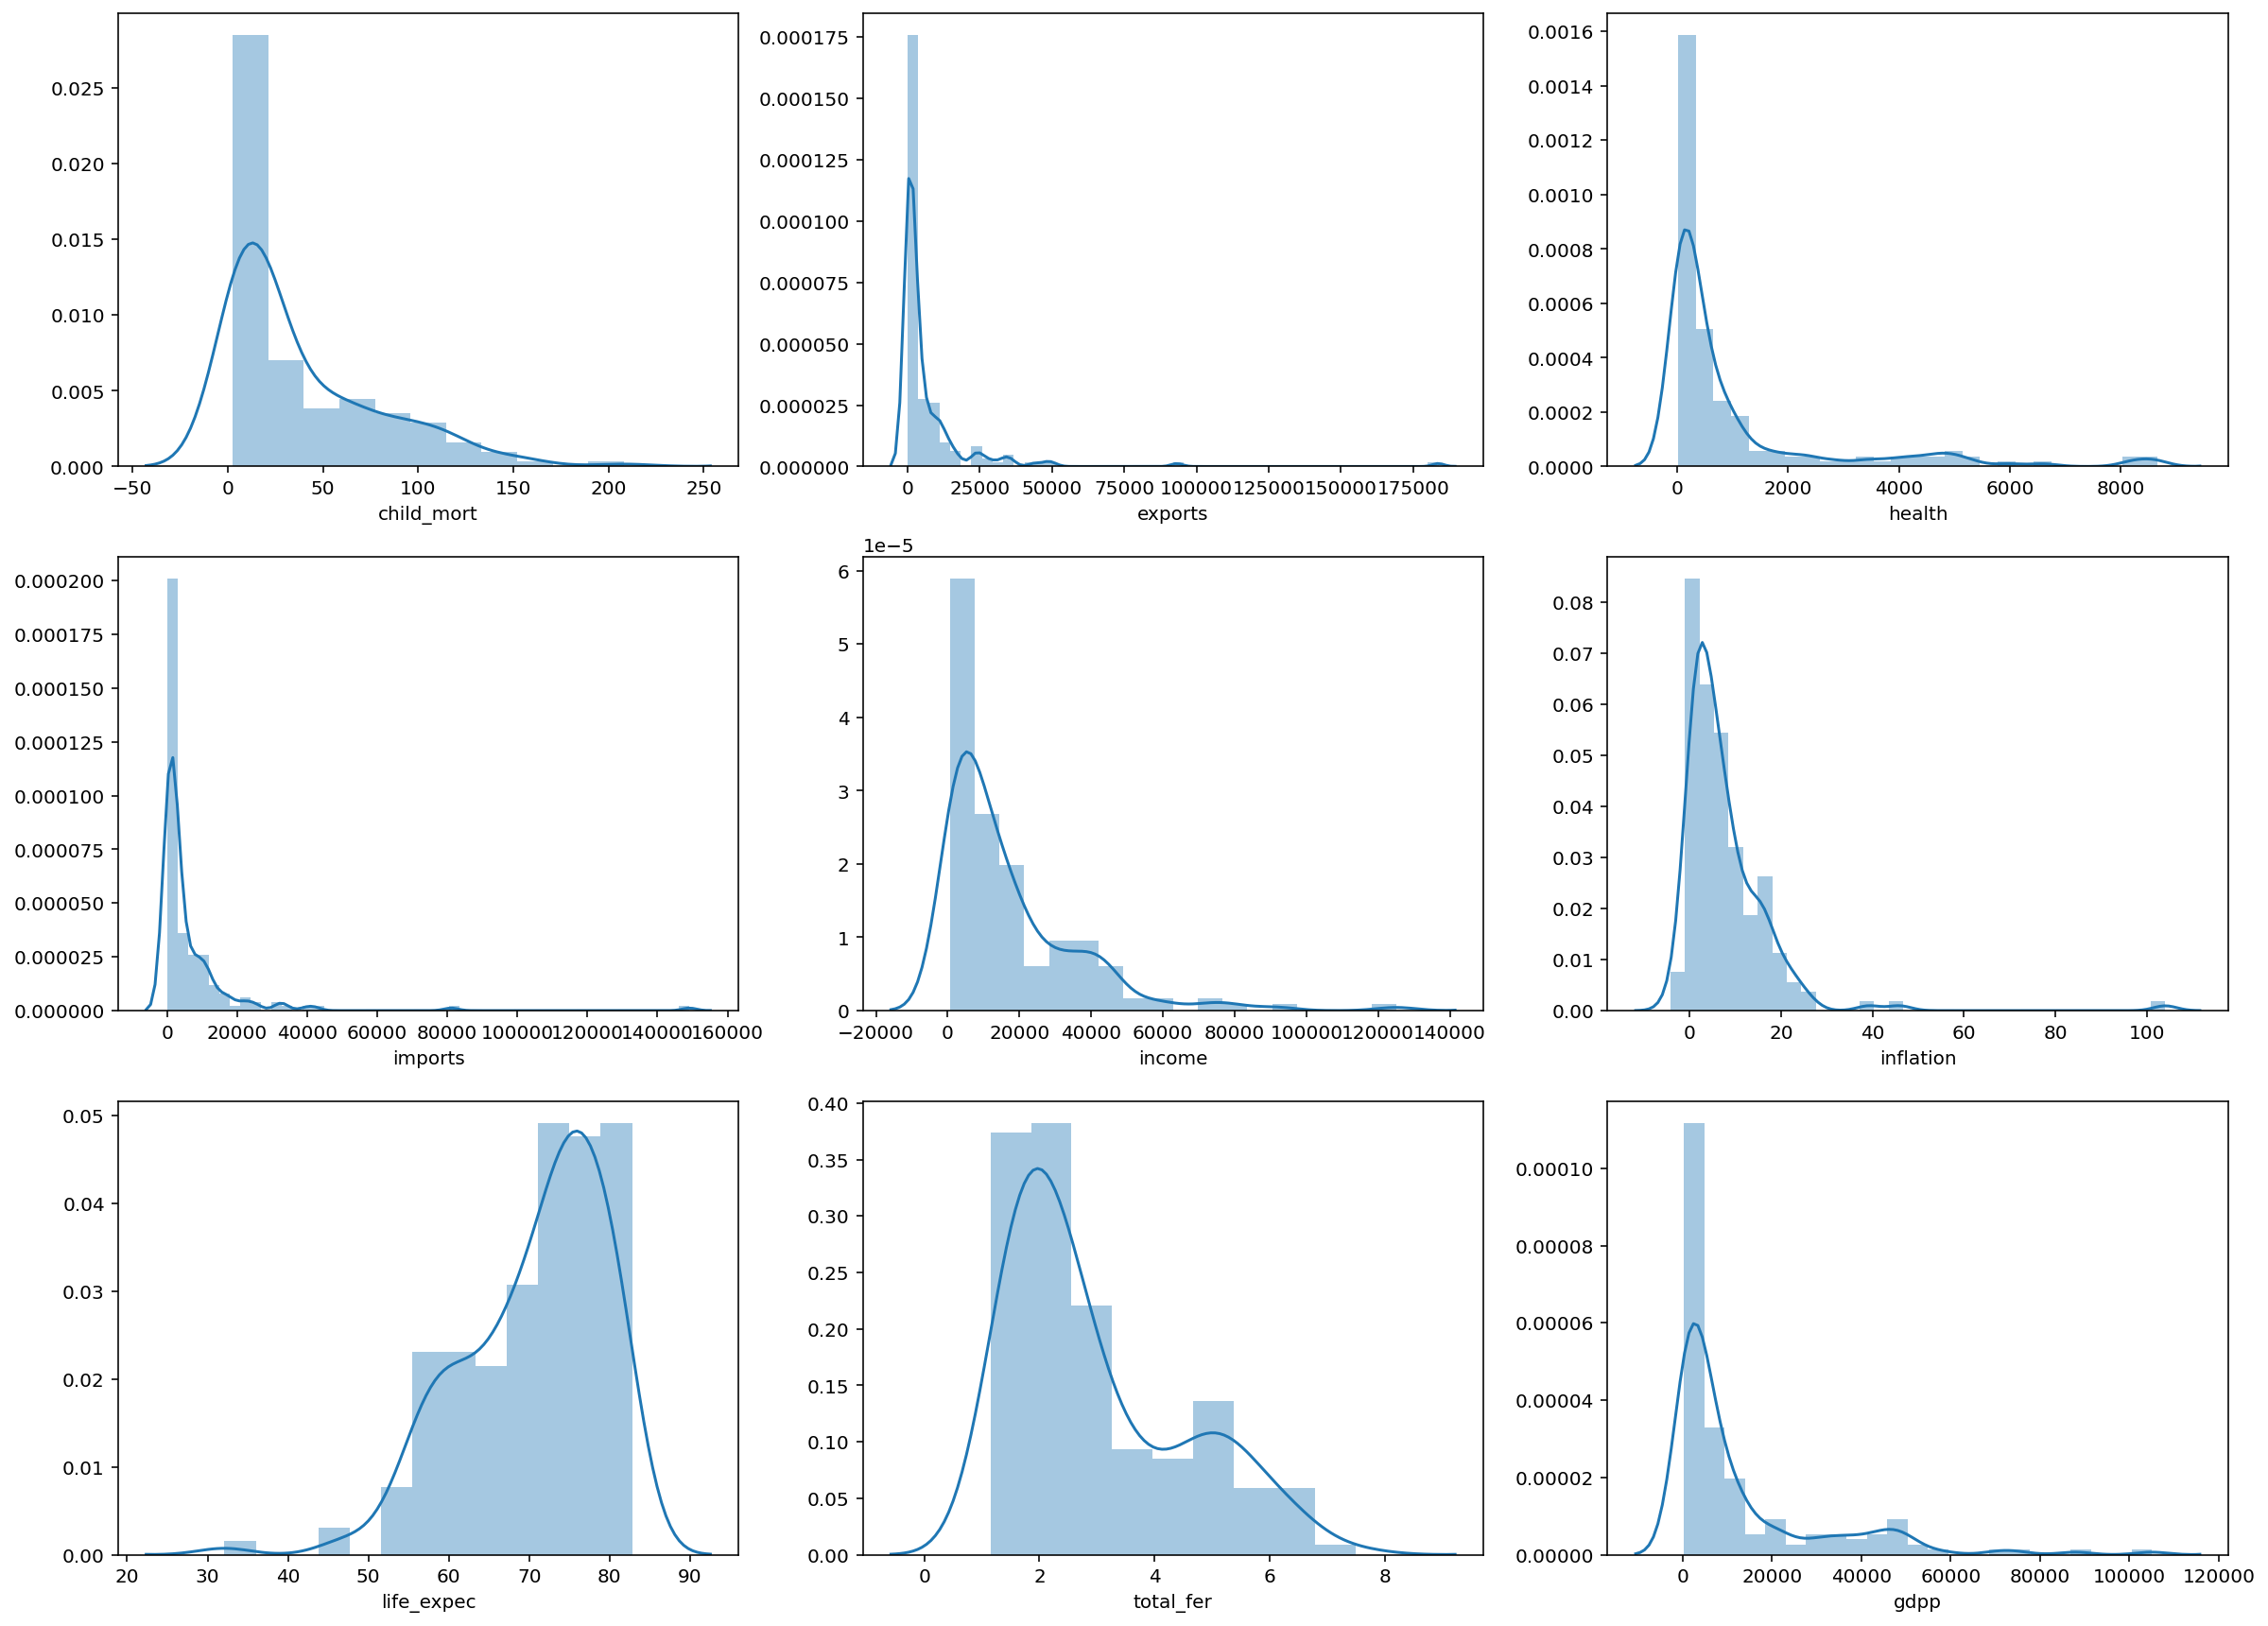

In [11]:
plt.figure(figsize=(20, 15))
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(Help_df[i[1]])

### Bivariate Analysis

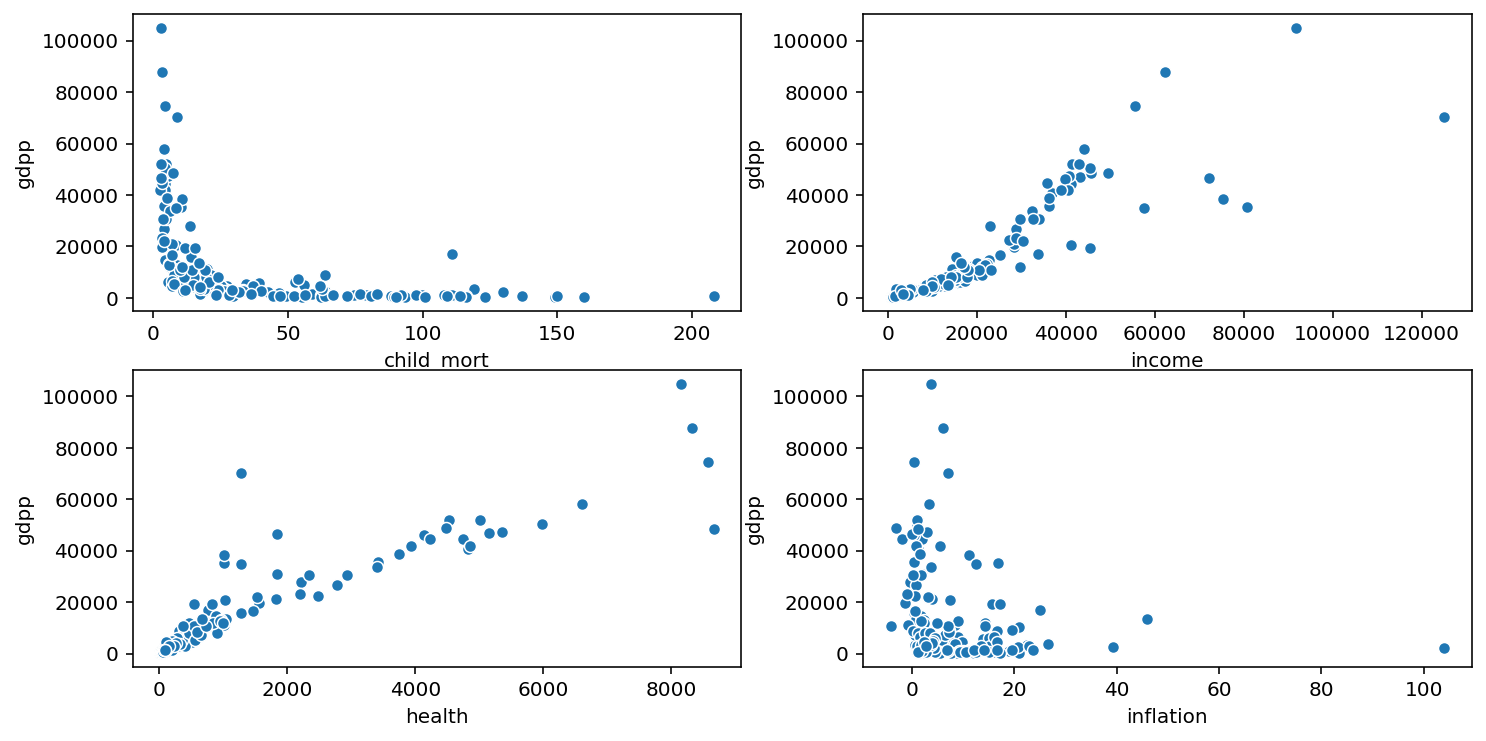

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.scatterplot(x = 'child_mort', y = 'gdpp', data = Help_df)
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'gdpp', data = Help_df)
plt.subplot(2,2,3)
sns.scatterplot(x = 'health', y = 'gdpp', data = Help_df)
plt.subplot(2,2,4)
sns.scatterplot(x = 'inflation', y = 'gdpp', data = Help_df)
plt.show()

### Observation of Bi variate Analysis:-
- The Graph between Child_mort and gdpp explains that the gdpp value is reducing when ever child_mort is increasing
- Income and Gdpp has the string correlation with each other as income increases Gdpp also increases, Kind of same with Health as well

##### The below pair plot explains the relationship between all the features with in the data set

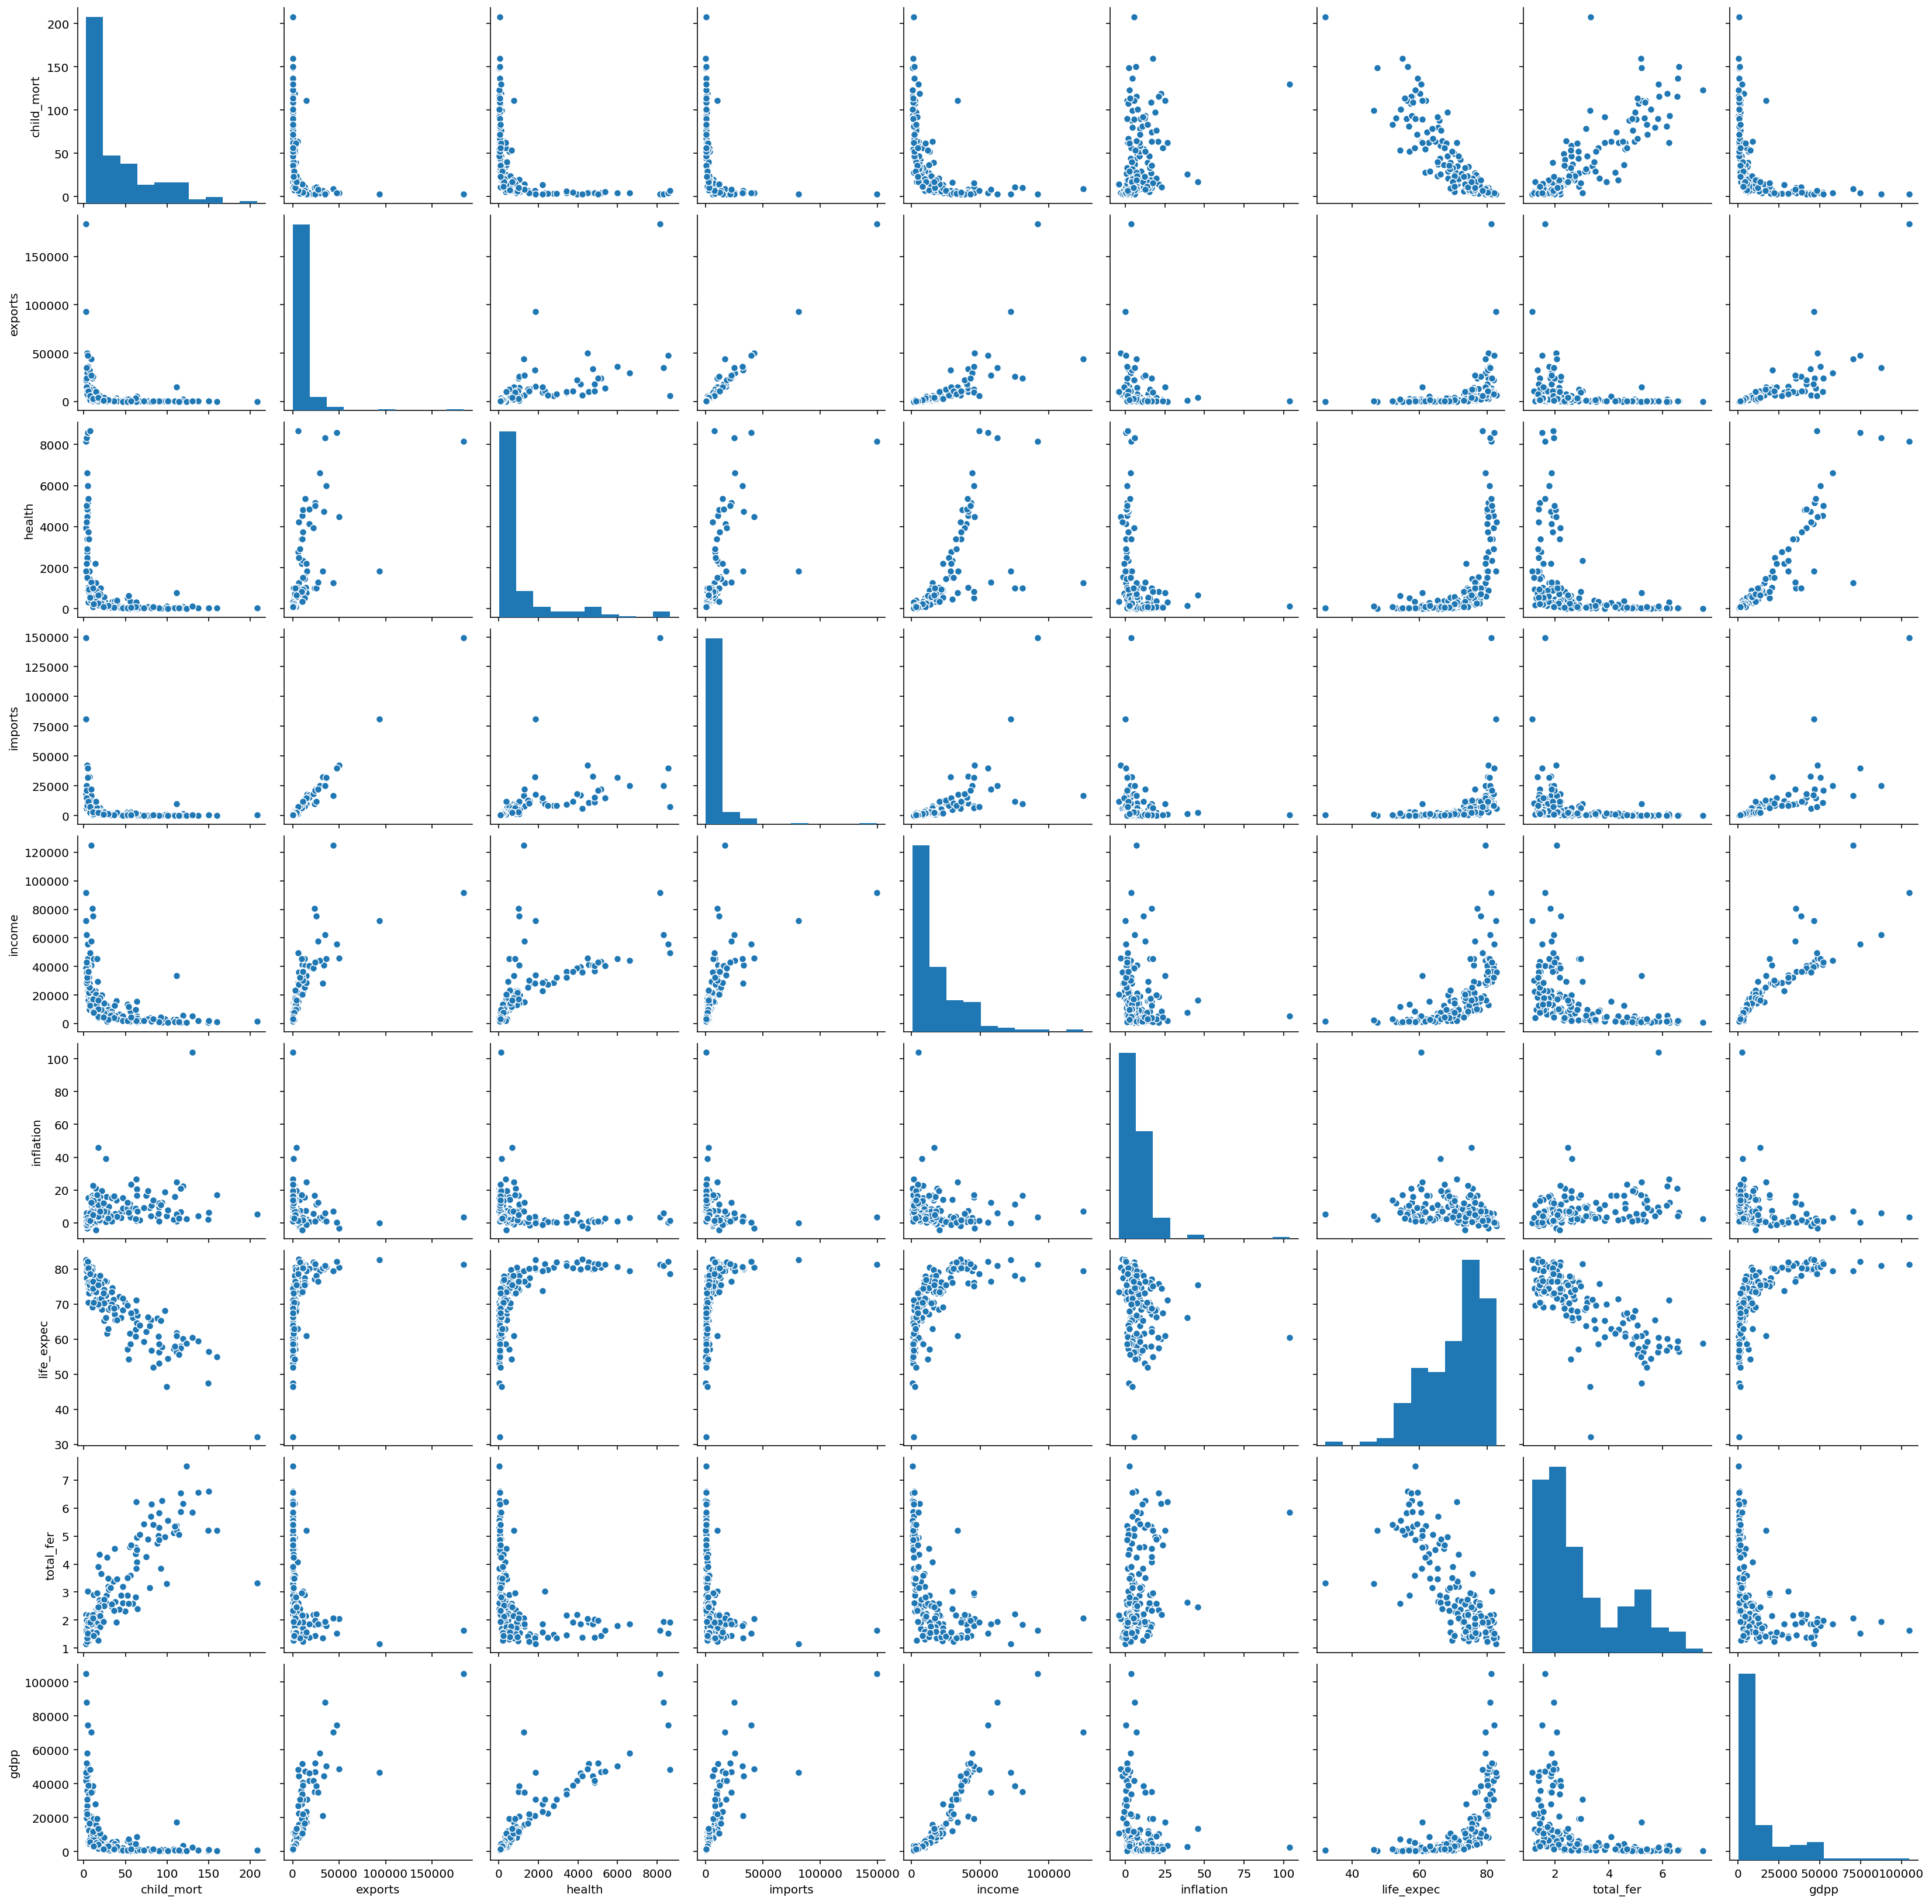

In [13]:
sns.pairplot(Help_df)
plt.show()

### Correlation matrix

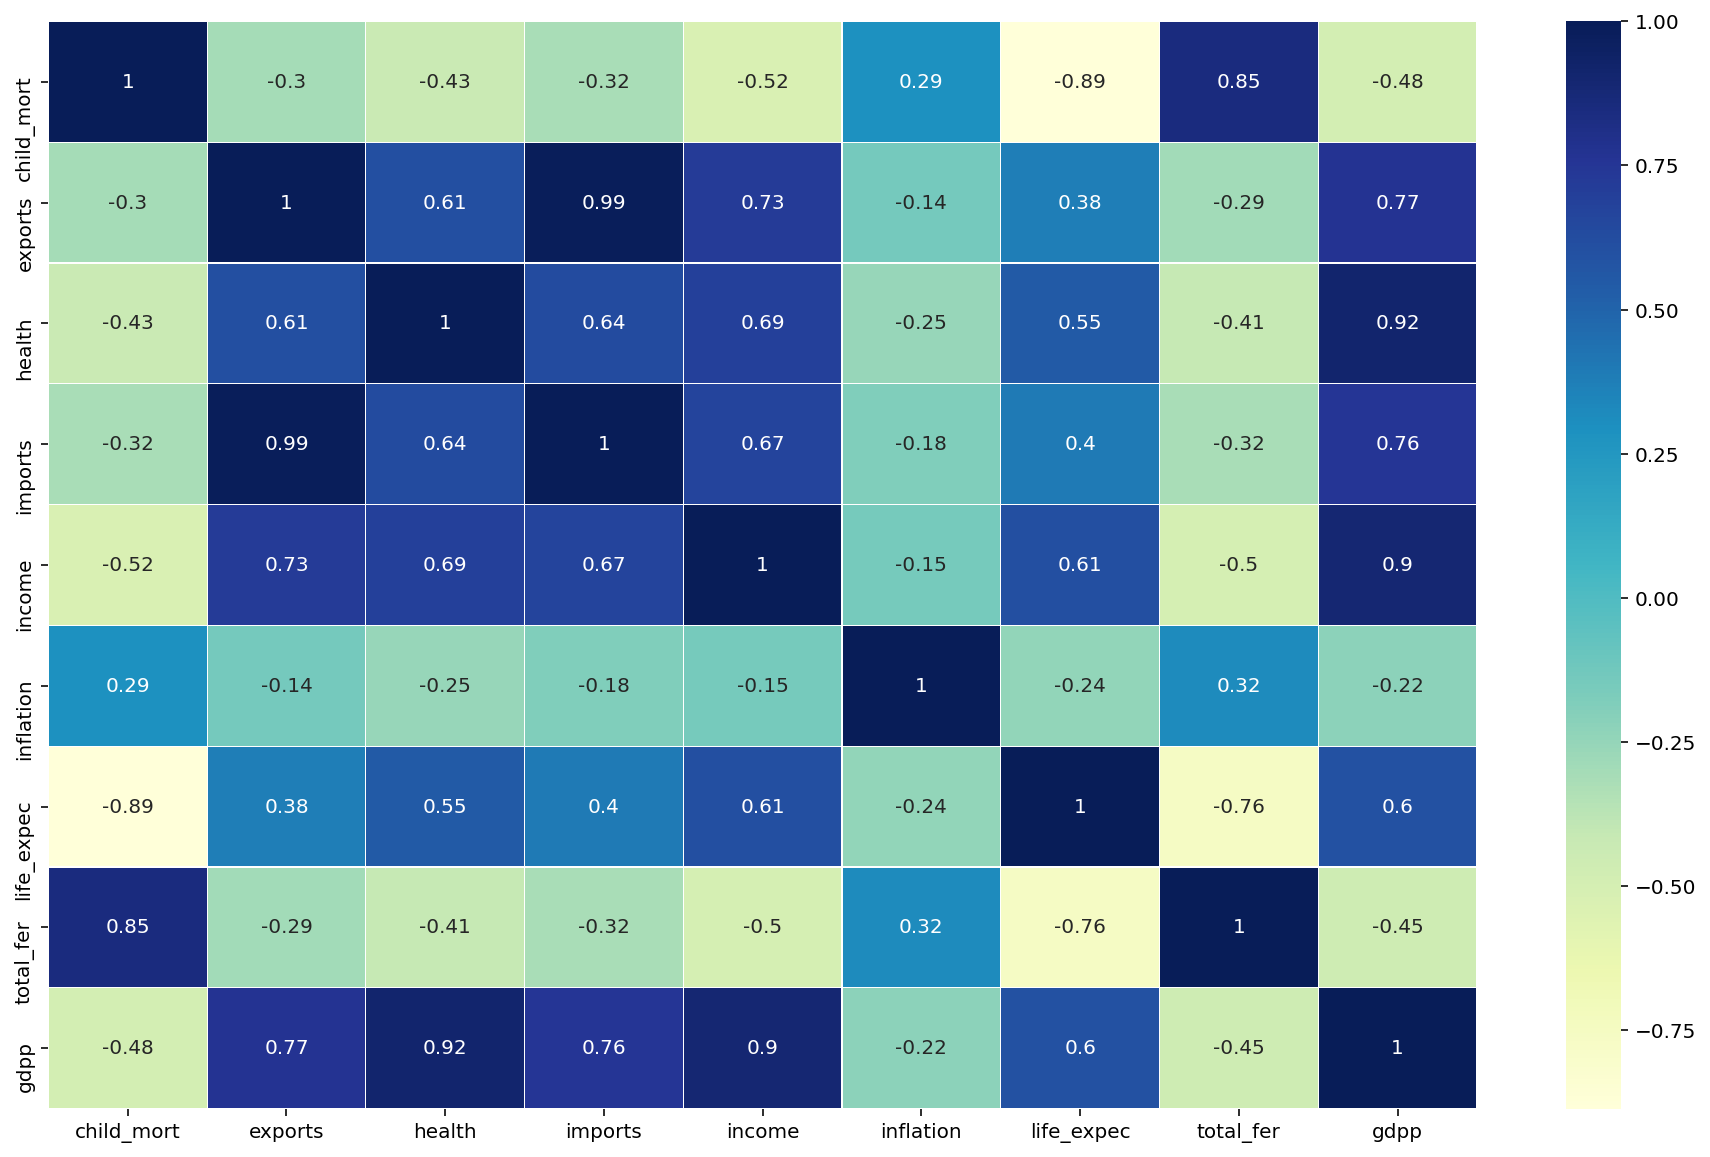

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(Help_df.corr(), cmap="YlGnBu", annot = True,linecolor = 'white',linewidths=0.1)
plt.show()

We Observed that there are no null values available in the data, hence we don't need to handle any null values in this data

### Outlier Analysis and Treatment

Lets understand each and every features and study if they are actual outliers or not.

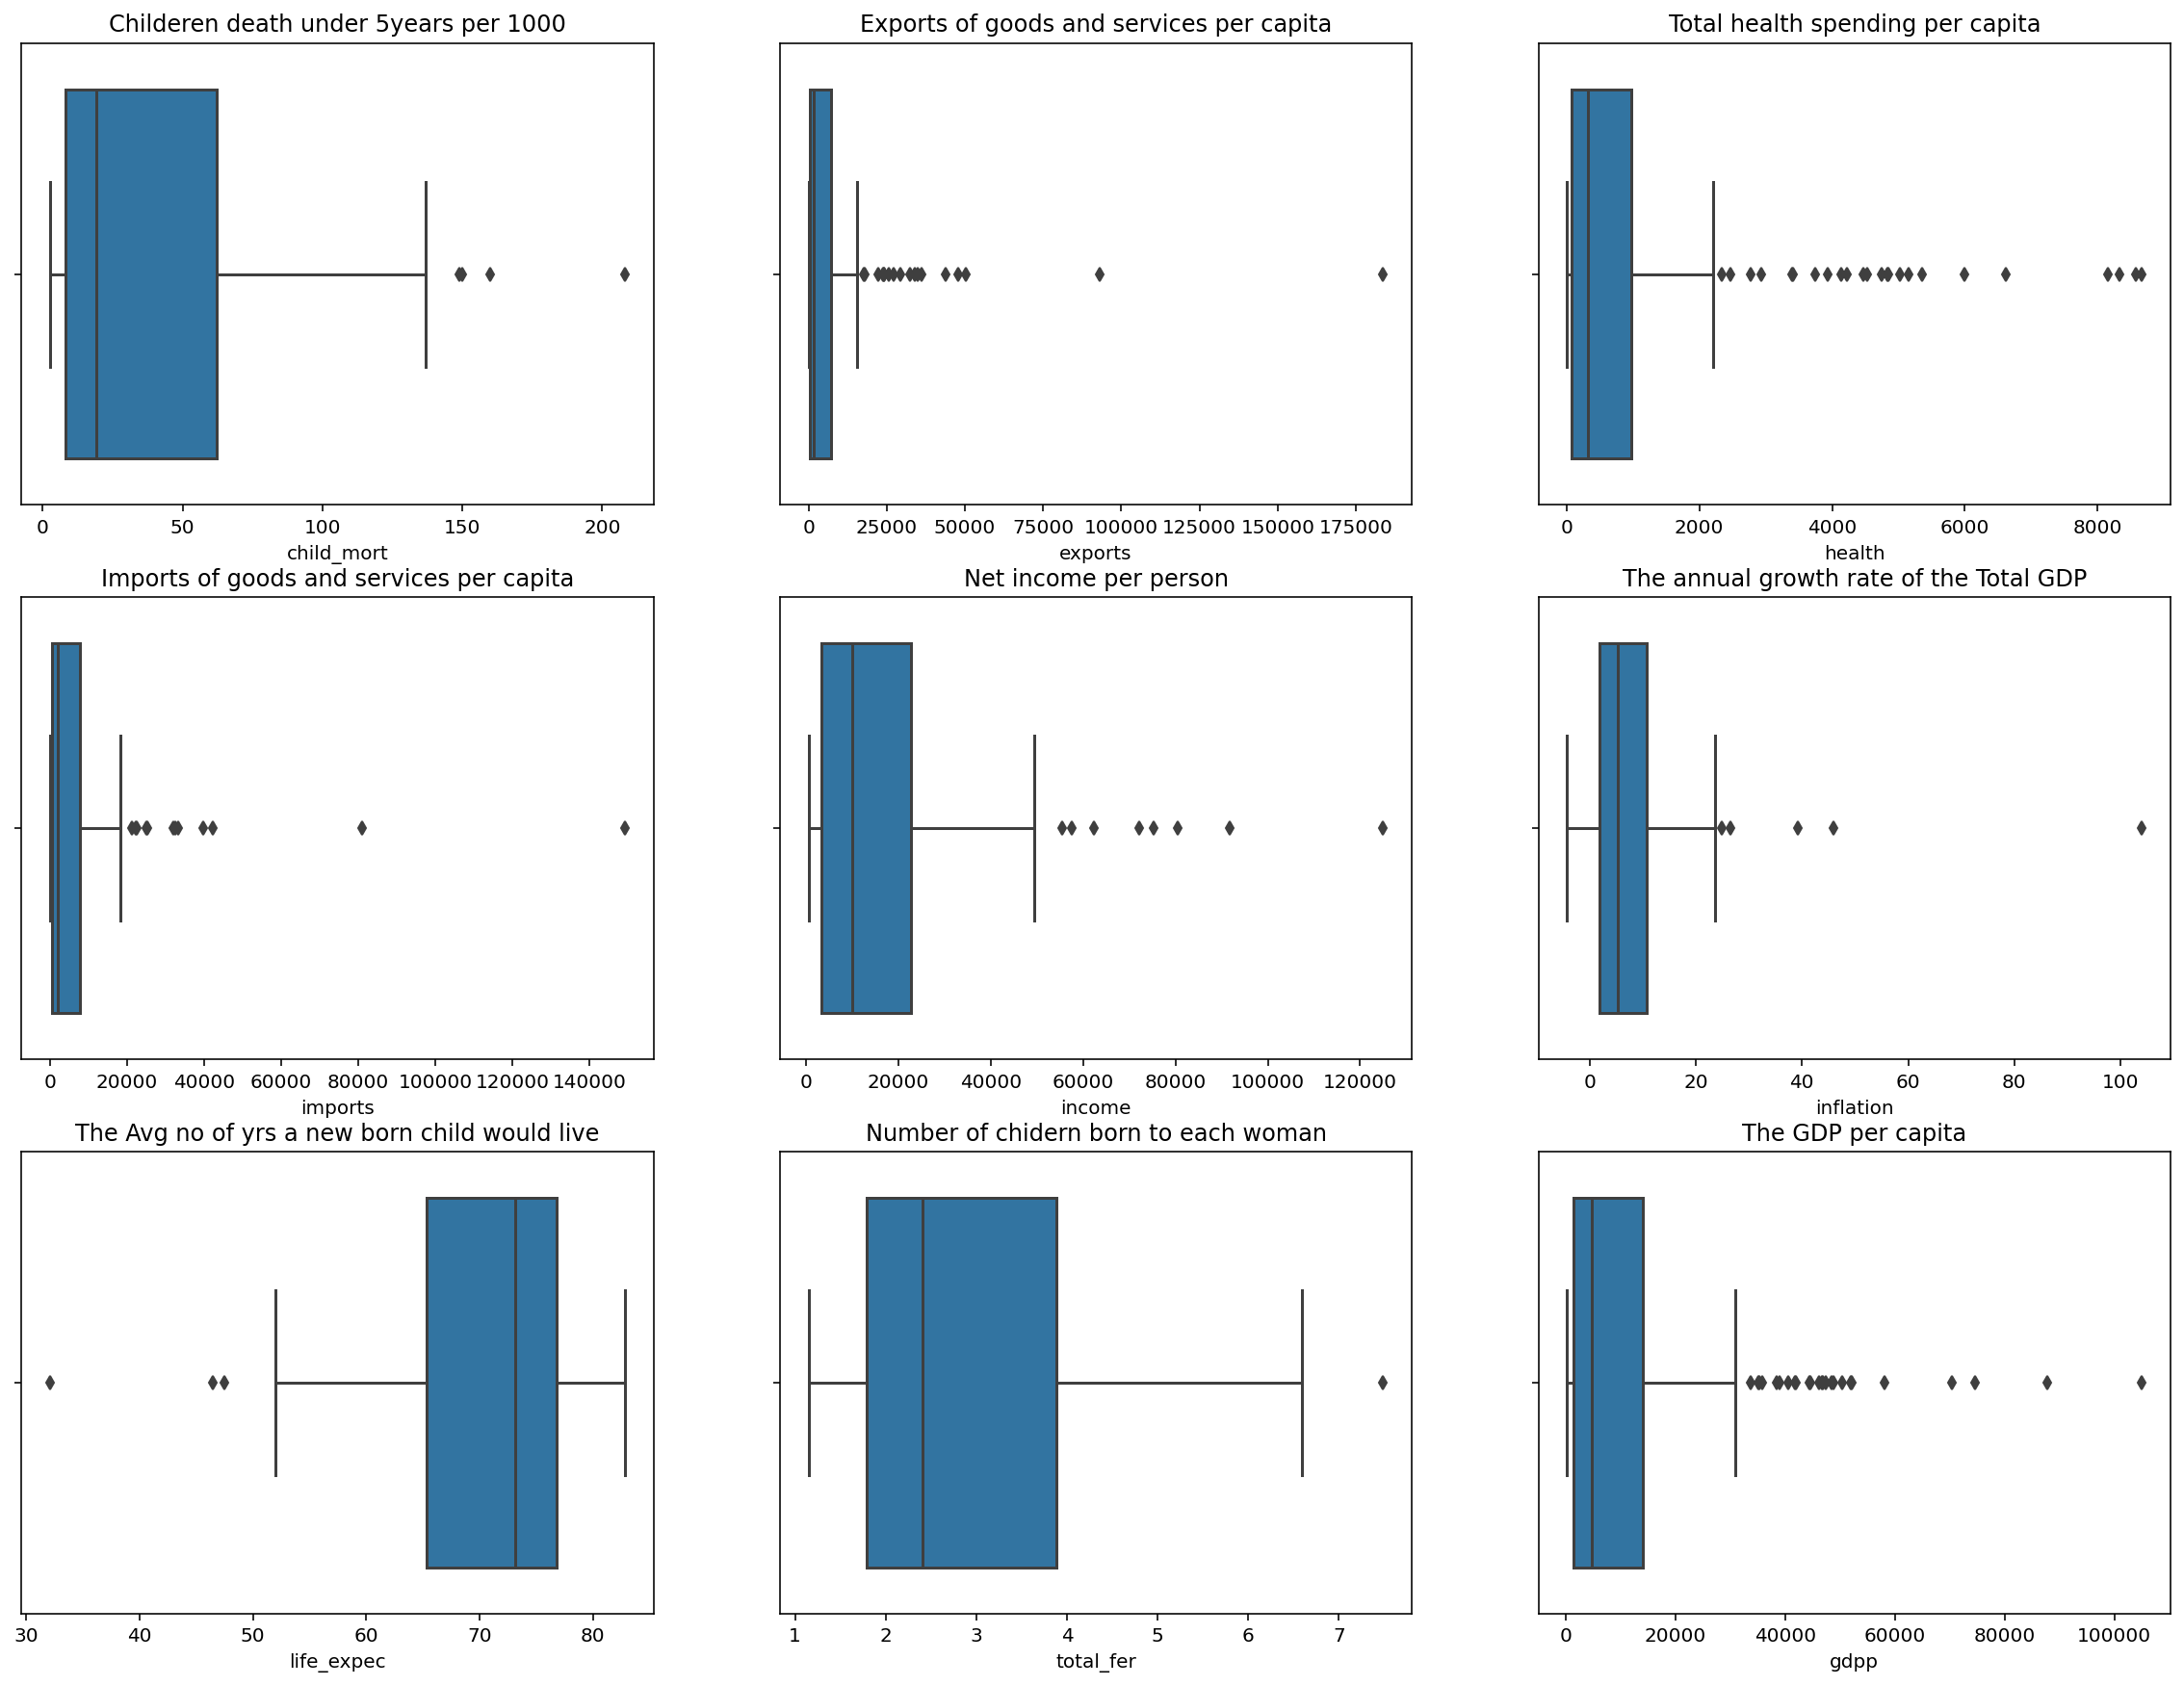

In [15]:
##Univariate analysis on Amounts change for Target 0 and target 1 Numerical/Continuous Variable
# subplots

# subplot 1
fig = plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x=Help_df['child_mort'].dropna())
plt.title('Childeren death under 5years per 1000')

# subplot 2
plt.subplot(3,3,2)
sns.boxplot(x=Help_df['exports'].dropna())
plt.title('Exports of goods and services per capita')


# subplot 3
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,3)
sns.boxplot(x=Help_df['health'].dropna())
plt.title('Total health spending per capita')

# subplot 4
plt.subplot(3,3,4)
sns.boxplot(x=Help_df['imports'].dropna())
plt.title('Imports of goods and services per capita')

# subplot 5
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,5)
sns.boxplot(x=Help_df['income'].dropna())
plt.title('Net income per person')

# subplot 6
plt.subplot(3,3,6)
sns.boxplot(x=Help_df['inflation'].dropna())
plt.title('The annual growth rate of the Total GDP')

# subplot 7
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,7)
sns.boxplot(x=Help_df['life_expec'].dropna())
#plt.xscale('log')
plt.title('The Avg no of yrs a new born child would live')

# subplot 8
plt.subplot(3,3,8)
sns.boxplot(x=Help_df['total_fer'].dropna())
#plt.xscale('log')
plt.title('Number of chidern born to each woman')


# subplot 9
plt.subplot(3,3,9)
sns.boxplot(x=Help_df['gdpp'].dropna())
#plt.xscale('log')
plt.title('The GDP per capita')

plt.show()

### Observations on the above boxplot analysis:
- We identified that all most all the features have some outliers lets understand each and every variable and see how to handle them.

- Child_mort:-
    the upper fence and lower fence value of this plot looks like between 0 and 200 as the calculation here considering the number of children for 1000, so most of the values looks valid records, We cap them based on the value range
- All features available in this dataset are not exact faulty values , hence all of them can be treated by capping , since the number of records are very less in the dataset
- Lets treat the important features like gdpp and Income

###### Treating gdpp


In [16]:
Help_df.gdpp.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50      4660.0
0.70     11920.0
0.90     41840.0
0.95     48610.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

###### Observation on gdpp value:-
- Based on the Quantile and univariate plotting we can understand that gdpp values are consistant till 95% of data but there is a huge varaiation in teh data from 0.95 to 1.00, Ideally they are not faulty values and can be utilized in our analysis, so We can cap them

In [17]:
Q1 = Help_df.gdpp.quantile(0.99)
Help_df['gdpp'][Help_df['gdpp']>=Q1]=Q1

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


###### Treating income :-
As part of the requirement we don't need to aid the countries with more income , based on the income data we can see that most of the outliers are available in upper range(which are less important to our analysis) , so we can cap them to avoid data loss.

In [18]:
Help_df.income.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50      9960.0
0.70     19540.0
0.90     41220.0
0.95     48290.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [19]:
Q2 = Help_df.income.quantile(0.99)
Help_df['income'][Help_df['income']>=Q2]=Q2

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


###### Exports:- 
A country with more exports are less likely needs an aid from any organization so we can treat the outliers of exports data with extreme more  values by capping them

In [20]:
Help_df.exports.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50      1777.44
0.70      5517.88
0.90     17760.60
0.95     31385.10
0.99     64794.26
1.00    183750.00
Name: exports, dtype: float64

In [21]:
Q3 = Help_df.exports.quantile(0.99)
Help_df['exports'][Help_df['exports']>=Q3]=Q3

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [22]:
Help_df.health.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50     321.8860
0.70     757.0880
0.90    3825.4160
0.95    4966.7010
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64

In [23]:
Q4 = Help_df.health.quantile(0.99)
Help_df['health'][Help_df['health']>=Q4]=Q4

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [24]:
Help_df.imports.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50      2045.580
0.70      5310.424
0.90     15034.280
0.95     24241.560
0.99     55371.390
1.00    149100.000
Name: imports, dtype: float64

In [25]:
Q5 = Help_df.imports.quantile(0.99)
Help_df['imports'][Help_df['imports']>=Q5]=Q5

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [26]:
Help_df.total_fer.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50    2.4100
0.70    3.3400
0.90    5.3220
0.95    5.8610
0.99    6.5636
1.00    7.4900
Name: total_fer, dtype: float64

In [27]:
Q6 = Help_df.total_fer.quantile(0.99)
Help_df['total_fer'][Help_df['total_fer']>=Q6]=Q6

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [28]:
Help_df.life_expec.quantile([0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.7,0.9,0.95,0.99,1.00])

0.00    32.10
0.01    47.16
0.05    55.78
0.10    57.82
0.20    61.88
0.30    66.28
0.40    70.06
0.50    73.10
0.70    76.40
0.90    80.40
0.95    81.40
0.99    82.37
1.00    82.80
Name: life_expec, dtype: float64

In [29]:
Q7 = Help_df.life_expec.quantile(0.05)
Help_df['life_expec'][Help_df['life_expec']<=Q7]=Q7

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [30]:
Help_df.inflation.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50      5.390
0.70      8.964
0.90     16.640
0.95     20.870
0.99     41.478
1.00    104.000
Name: inflation, dtype: float64

In [31]:
Q8 = Help_df.inflation.quantile(0.99)
Help_df['inflation'][Help_df['inflation']>=Q8]=Q8

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [32]:
Help_df.child_mort.quantile([0.5,0.7,0.9,0.95,0.99,1.00])

0.50     19.30
0.70     50.00
0.90    100.22
0.95    116.00
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64

In [33]:
Q9 = Help_df.child_mort.quantile(0.99)
Help_df['child_mort'][Help_df['child_mort']>=Q9]=Q9

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


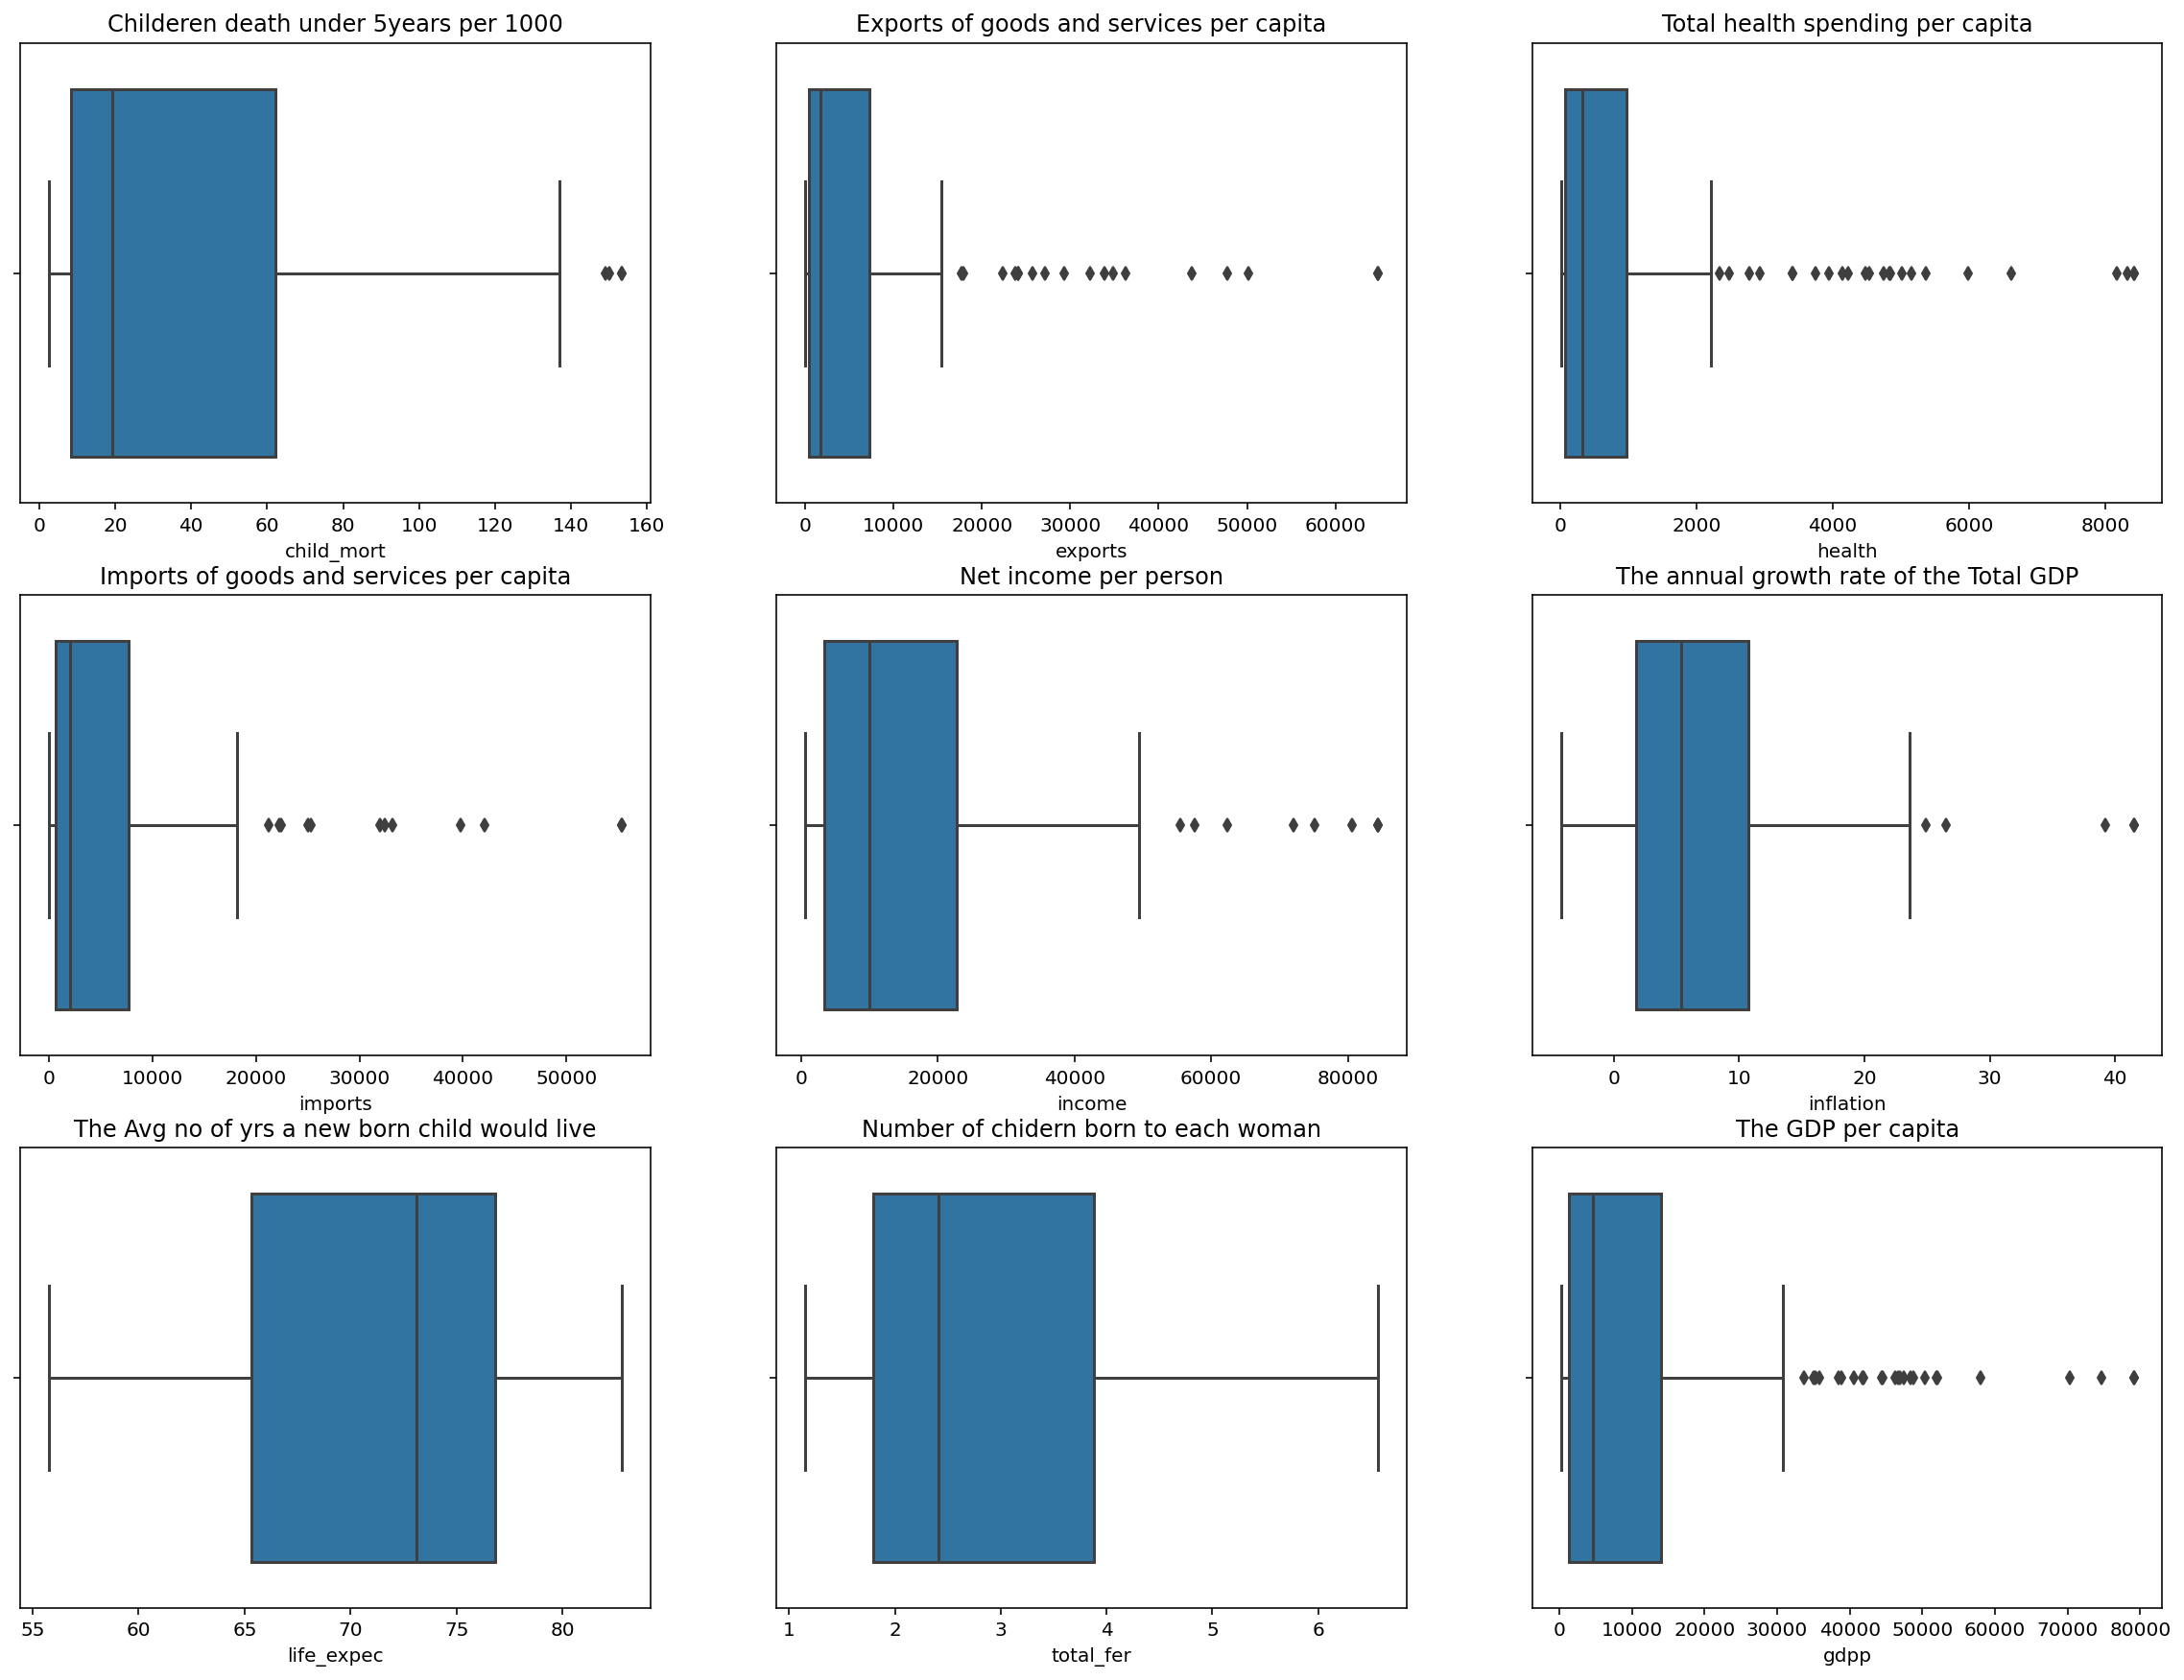

In [34]:
##Univariate analysis on Amounts change for Target 0 and target 1 Numerical/Continuous Variable
# subplots

# subplot 1
fig = plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x=Help_df['child_mort'].dropna())
plt.title('Childeren death under 5years per 1000')

# subplot 2
plt.subplot(3,3,2)
sns.boxplot(x=Help_df['exports'].dropna())
plt.title('Exports of goods and services per capita')


# subplot 3
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,3)
sns.boxplot(x=Help_df['health'].dropna())
plt.title('Total health spending per capita')

# subplot 4
plt.subplot(3,3,4)
sns.boxplot(x=Help_df['imports'].dropna())
plt.title('Imports of goods and services per capita')

# subplot 5
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,5)
sns.boxplot(x=Help_df['income'].dropna())
plt.title('Net income per person')

# subplot 6
plt.subplot(3,3,6)
sns.boxplot(x=Help_df['inflation'].dropna())
plt.title('The annual growth rate of the Total GDP')

# subplot 7
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,7)
sns.boxplot(x=Help_df['life_expec'].dropna())
#plt.xscale('log')
plt.title('The Avg no of yrs a new born child would live')

# subplot 8
plt.subplot(3,3,8)
sns.boxplot(x=Help_df['total_fer'].dropna())
#plt.xscale('log')
plt.title('Number of chidern born to each woman')


# subplot 9
plt.subplot(3,3,9)
sns.boxplot(x=Help_df['gdpp'].dropna())
#plt.xscale('log')
plt.title('The GDP per capita')

plt.show()

## 3. Prepare the data for modelling

In [35]:
## Rescaling the Features

from sklearn.preprocessing import StandardScaler

- Creating a new data set by dropping the country Variable since the country is not Numerical variable and may interrupt the scaling of the remaining features
- Scaling the continuous variables with in the data set using Standard Scaler method

In [36]:
scaler = StandardScaler()

In [37]:
Help_df1=Help_df.drop('country', axis=1)

In [38]:
Help_df2=scaler.fit_transform(Help_df1)

In [39]:
Help_df2=pd.DataFrame(Help_df2)
Help_df2.columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [40]:
Help_df2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.063687e-17,7.645248e-17,1.196648e-17,2.925139e-17,-2.592736e-17,-2.592736e-17,-1.701899e-16,1.223240e-16,8.044131e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.072942e-01,-5.743864e-01,-5.832538e-01,-6.251016e-01,-9.075796e-01,-1.491787e+00,-1.871151e+00,-1.199761e+00,-7.207887e-01
25%,-7.620905e-01,-5.351931e-01,-5.464489e-01,-5.570227e-01,-7.541989e-01,-7.169978e-01,-6.901751e-01,-7.679895e-01,-6.575476e-01
50%,-4.781081e-01,-4.183061e-01,-4.101544e-01,-4.074274e-01,-3.852698e-01,-2.562428e-01,2.774309e-01,-3.563007e-01,-4.659254e-01
75%,6.218421e-01,6.500132e-02,-4.327510e-02,1.965485e-01,3.319216e-01,4.336026e-01,7.364235e-01,6.277359e-01,7.441465e-02
max,2.968231e+00,5.118675e+00,4.119980e+00,5.268884e+00,3.771201e+00,4.388373e+00,1.480736e+00,2.424172e+00,3.816975e+00


In [41]:
Help_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.819049,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.674398,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.699208,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.335246,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.736424,-0.543736,-0.032042


#### Checking the cluster tendency by Hopkins Test:-

In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d=X.shape[1]
    n=len(X)
    m=int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X=sample(range(0,n,1),m)
    
    ujd=[]
    wjd=[]
    
    for j in range(0,m):
        u_dist, _= nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1),2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _=nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
    
    H=sum(ujd)/(sum(ujd)+sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H=0
    
    return H
                

In [43]:
hopkins(Help_df2)

0.901836446417468

## 4. Modelling

### K Means Clustering
###### Finding the Optimal Number of Clusters
We Have two methods for identifying the K value:-
- Silhouette score Plot
- Elbow Curve

In [44]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Help_df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Help_df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47084209725914433
For n_clusters=3, the silhouette score is 0.40843367392603697


For n_clusters=4, the silhouette score is 0.39691649444902594
For n_clusters=5, the silhouette score is 0.38597168449023445


For n_clusters=6, the silhouette score is 0.3022366640666064


For n_clusters=7, the silhouette score is 0.3143571659464769


For n_clusters=8, the silhouette score is 0.28295885778860824


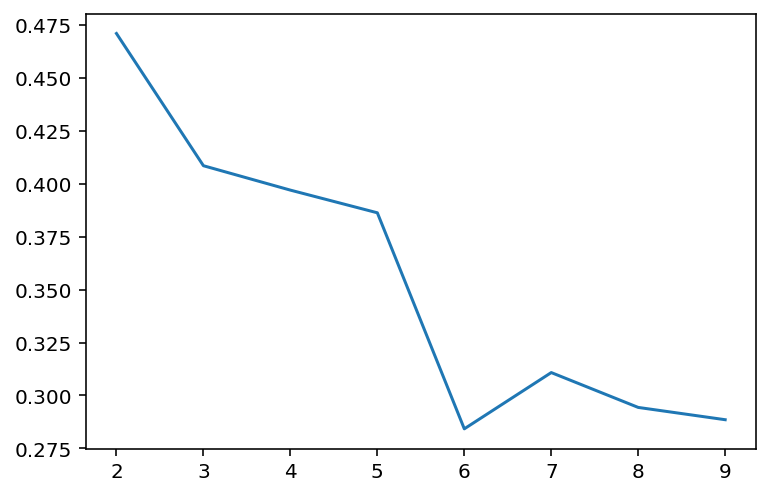

In [45]:
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(Help_df2)
    ss.append([k,silhouette_score(Help_df2,kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1]);

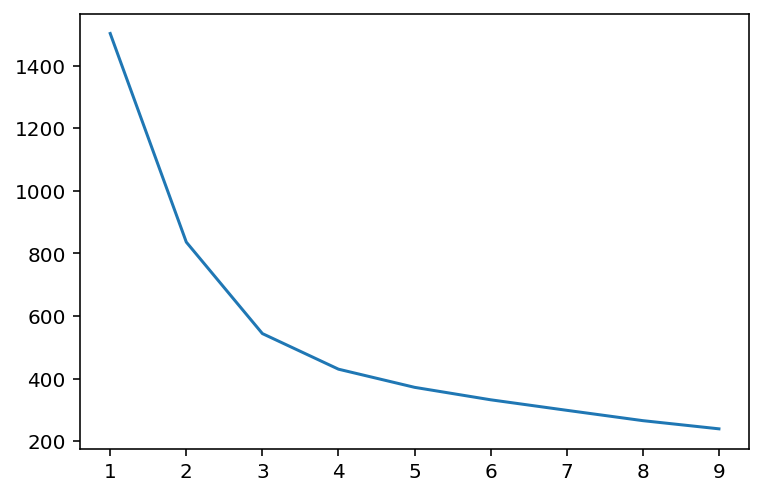

In [46]:
ssd=[]
for k in list(range(1,10)):
    model=KMeans(n_clusters=k,max_iter=50).fit(Help_df2)
    ssd.append([k,model.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1]);

#### K Mean calculation with the K Value we have chosen

In [47]:
kmean=KMeans(n_clusters=3, max_iter=50,random_state=50)
kmean.fit(Help_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [48]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [49]:
Help_KM=pd.concat([Help_df,pd.Series(kmean.labels_)],axis=1)

In [50]:
Help_KM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [51]:
Help_KM.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']
Help_KM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [52]:
#Check the count of Observation per Cluster
Help_KM['clusterid'].value_counts()

0    89
2    48
1    30
Name: clusterid, dtype: int64

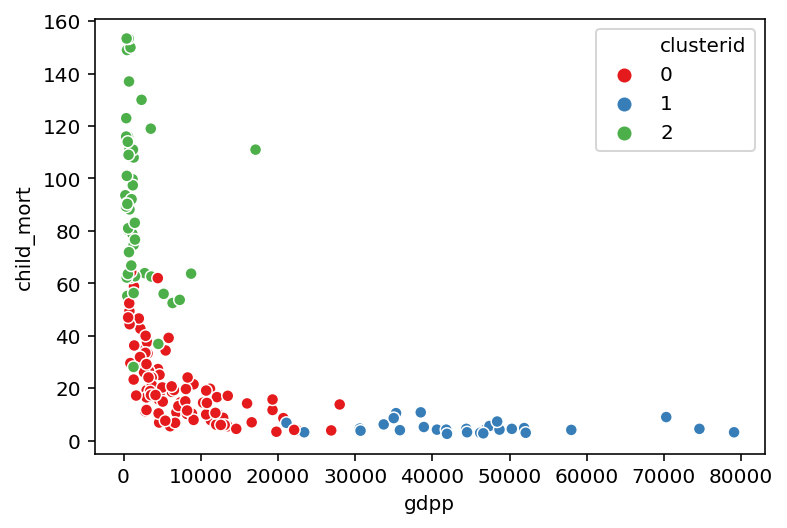

In [53]:
#Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='gdpp',y='child_mort',hue='clusterid',legend='full',data=Help_KM,palette='Set1')
plt.show()

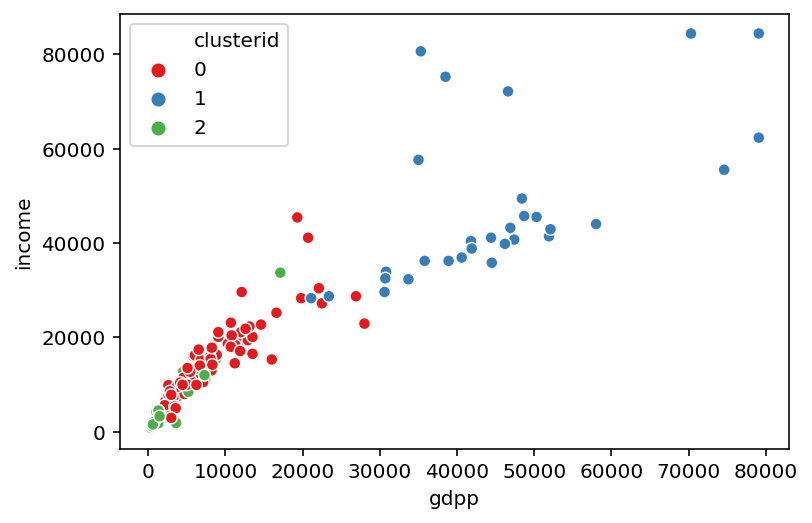

In [54]:
sns.scatterplot(x='gdpp',y='income',hue='clusterid',legend='full',data=Help_KM,palette='Set1')
plt.show()

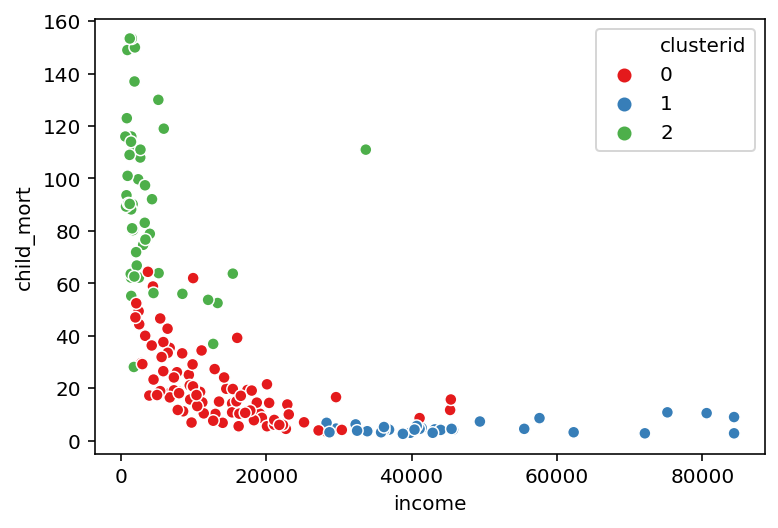

In [55]:
sns.scatterplot(x='income',y='child_mort',hue='clusterid',legend='full',data=Help_KM,palette='Set1')
plt.show()

### Cluster Profiling

In [56]:
Help_KM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [57]:
Help_KM.drop('country',axis=1).groupby('clusterid').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusterid,,,,,,,,,
0,20.726966,3395.746051,508.603488,3515.332821,13626.853933,7.170955,73.303371,2.233596,7552.494382
1,4.970000,24915.514000,4175.845027,20941.719333,47178.266667,2.839800,80.510000,1.796667,45552.533333
2,90.335417,879.063521,114.821765,827.028771,3897.354167,10.608604,60.310833,4.972233,1909.208333


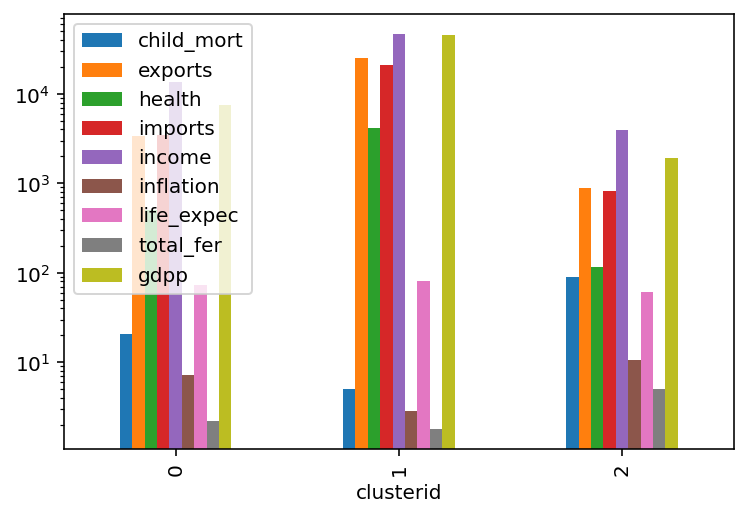

In [58]:

Help_KM.drop('country',axis=1).groupby('clusterid').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

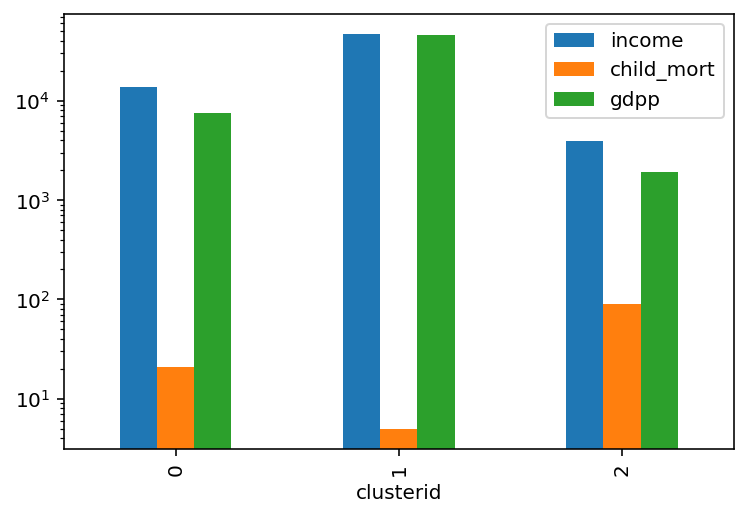

In [59]:
Help_KM[['income','child_mort','gdpp','clusterid']].groupby('clusterid').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

#### Finding the observations that belong to certain cluster

In [60]:
Help_KM[Help_KM['clusterid']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [61]:
Help_KM[Help_KM['clusterid']==2].sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.80,6.5636,348.0,2
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.78,5.2000,399.0,2


### Hierarchical Clustering

In [62]:
Help_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.819049,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.674398,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.699208,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.335246,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.736424,-0.543736,-0.032042


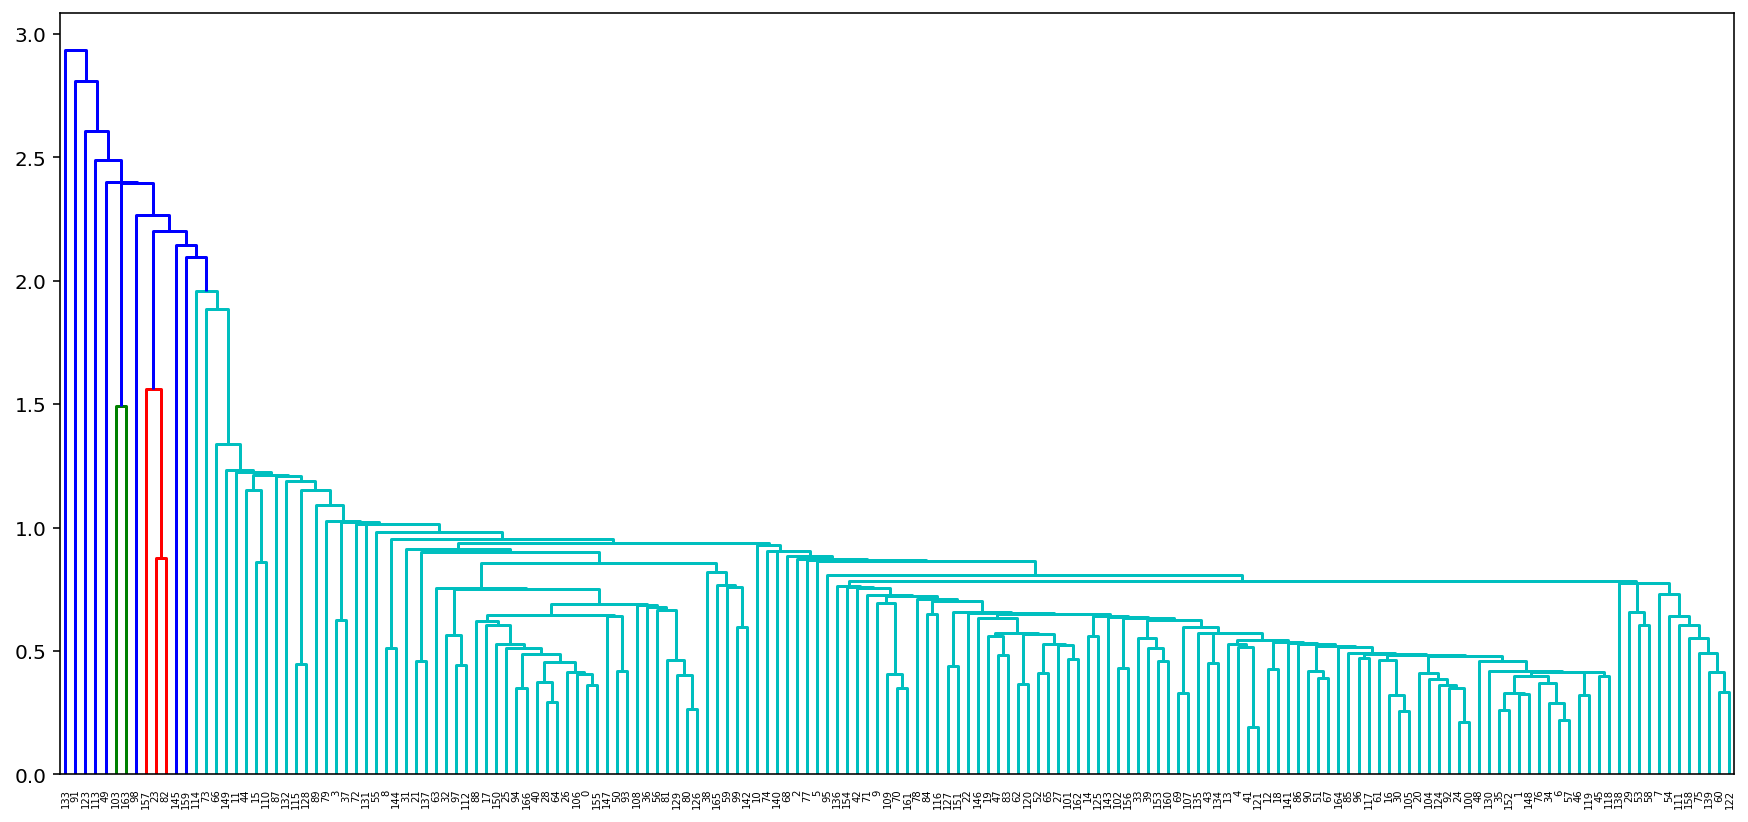

In [63]:
# single linkage
plt.figure(figsize=(15, 7))
mergings = linkage(Help_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

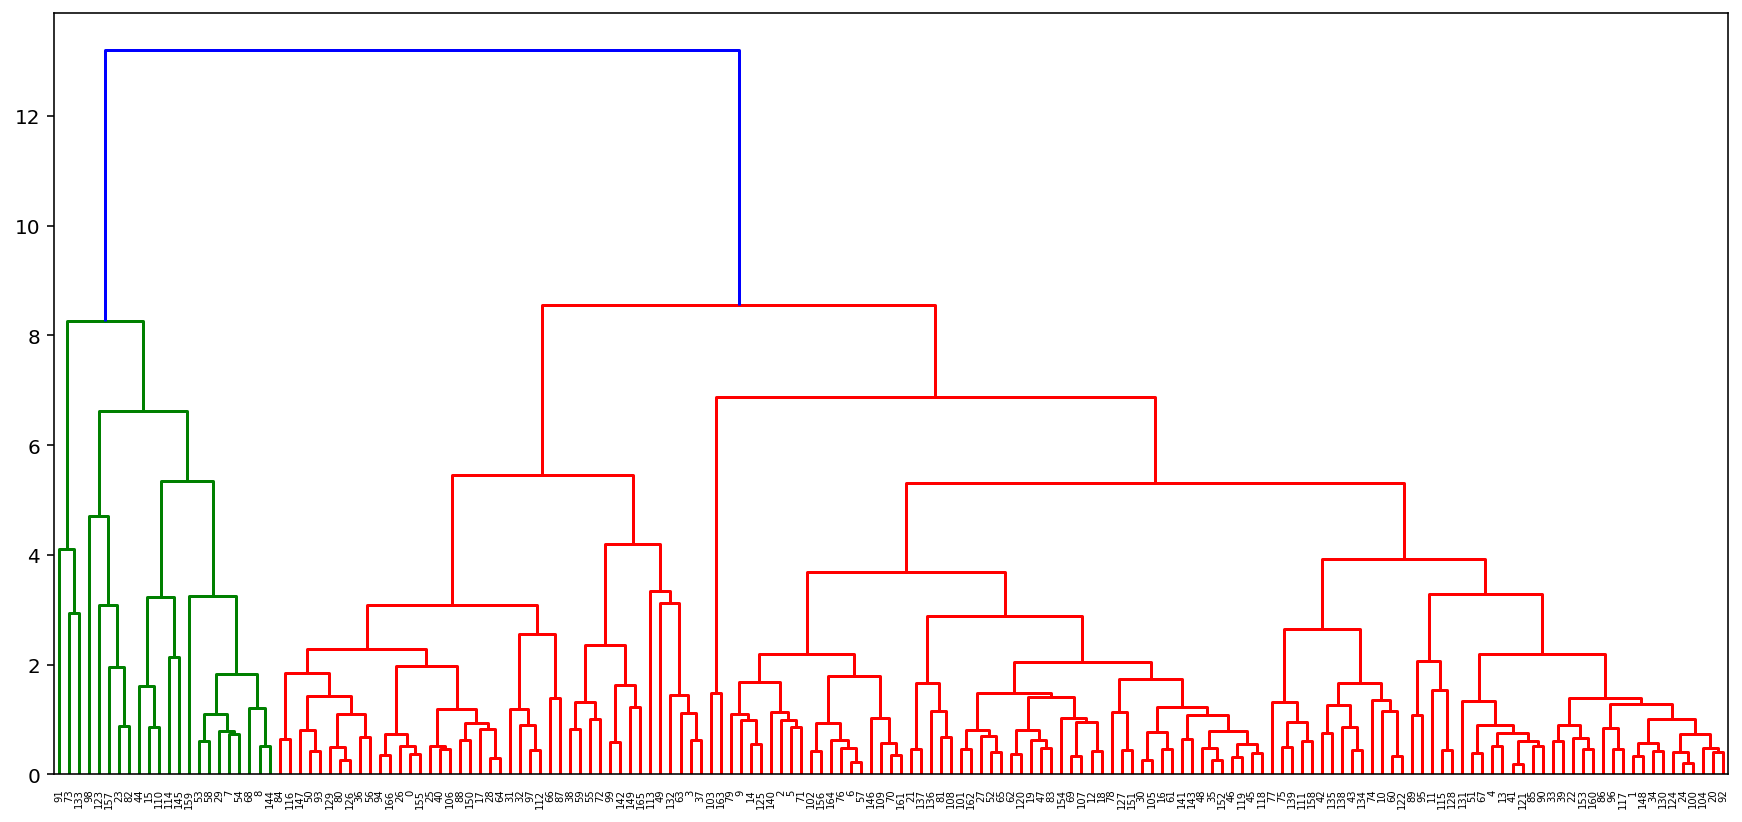

In [64]:
# complete linkage
plt.figure(figsize=(15, 7))
mergings = linkage(Help_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [65]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [66]:
# assign cluster labels
Help_HM=pd.concat([Help_df,pd.Series(cluster_labels)],axis=1)

In [67]:
Help_HM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.20,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.30,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.50,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.10,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.80,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.00,3.50,2970.0,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.40,2.47,13500.0,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.10,1.95,1310.0,1
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.50,4.67,1310.0,0


In [68]:
Help_HM.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']
Help_HM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [69]:
#Check the count of Observation per Cluster
Help_HM['clusterid'].value_counts()

1    102
0     43
2     22
Name: clusterid, dtype: int64

In [70]:
Help_HM.drop('country',axis=1).groupby('clusterid').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusterid,,,,,,,,,
0,94.955814,791.381605,86.116644,675.739326,3483.790698,11.210535,60.489302,5.151563,1628.883721
1,20.897059,3885.400378,697.714210,4033.682462,14855.490196,6.588696,73.198824,2.257549,9433.058824
2,5.240909,30070.073636,4599.210945,24560.053636,52279.454545,3.569182,80.313636,1.798636,49917.090909


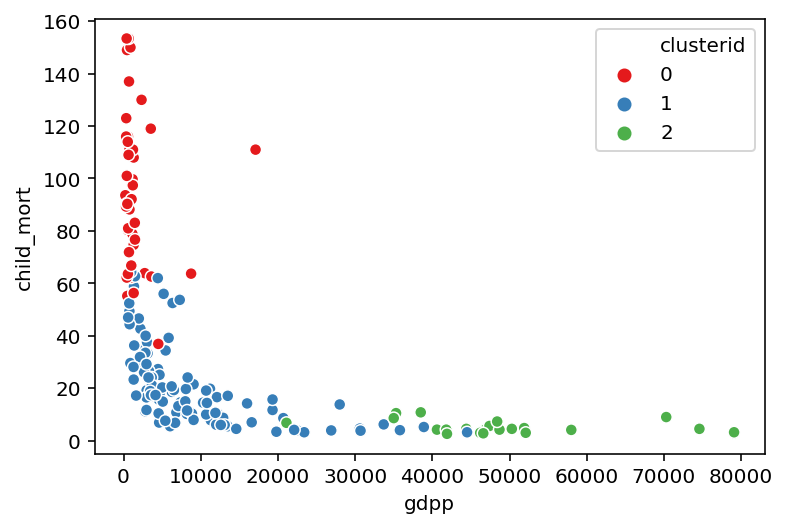

In [71]:
#Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='gdpp',y='child_mort',hue='clusterid',legend='full',data=Help_HM,palette='Set1')
plt.show()

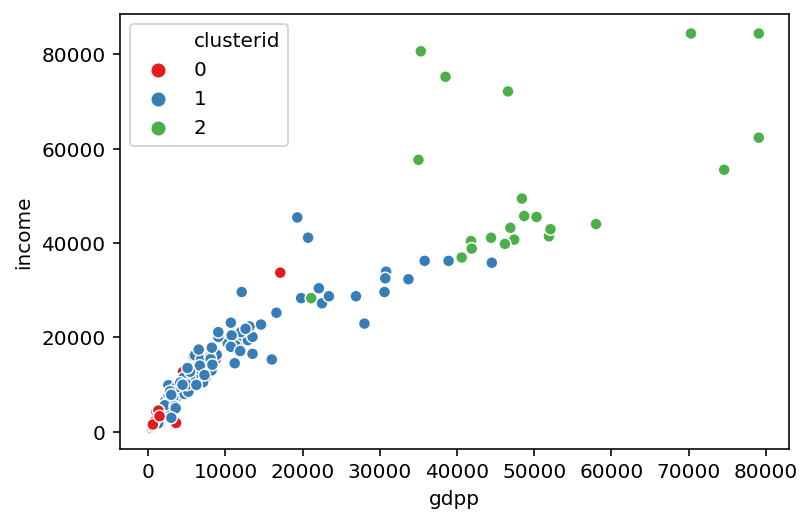

In [72]:
sns.scatterplot(x='gdpp',y='income',hue='clusterid',legend='full',data=Help_HM,palette='Set1')
plt.show()

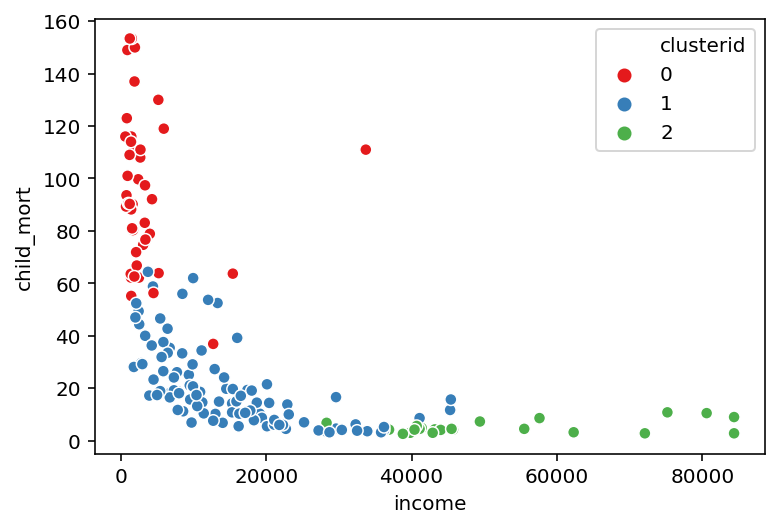

In [73]:
sns.scatterplot(x='income',y='child_mort',hue='clusterid',legend='full',data=Help_HM,palette='Set1')
plt.show()

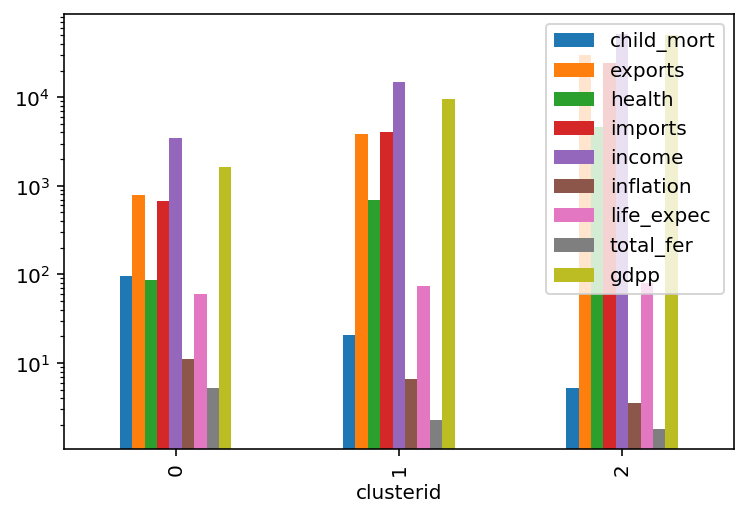

In [74]:
Help_HM.drop('country',axis=1).groupby('clusterid').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

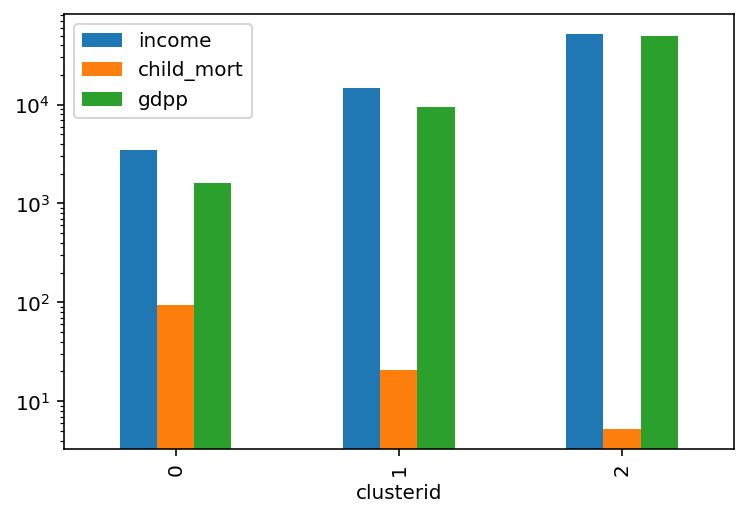

In [75]:
Help_HM[['income','child_mort','gdpp','clusterid']].groupby('clusterid').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

In [76]:
Help_HM[Help_HM['clusterid']==0].sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.80,6.5636,348.0,0
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.78,5.2000,399.0,0
